In [1]:
# pip install tensorflow

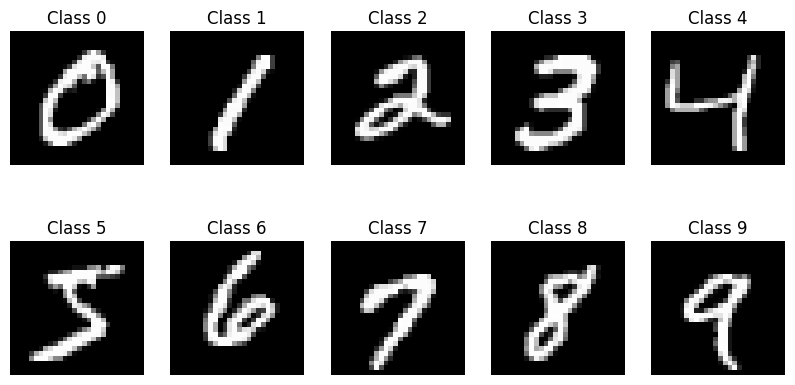

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8797 - loss: 0.4085 - val_accuracy: 0.9636 - val_loss: 0.1124
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9677 - loss: 0.1015 - val_accuracy: 0.9748 - val_loss: 0.0834
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9790 - loss: 0.0662 - val_accuracy: 0.9720 - val_loss: 0.0939
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9837 - loss: 0.0501 - val_accuracy: 0.9768 - val_loss: 0.0790
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9865 - loss: 0.0418 - val_accuracy: 0.9736 - val_loss: 0.0930
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.0346 - val_accuracy: 0.9747 - val_loss: 0.0949
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9904 - loss: 0.0284 - val_accuracy: 0.9644 - val_loss: 0.1249
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9916 - loss: 0

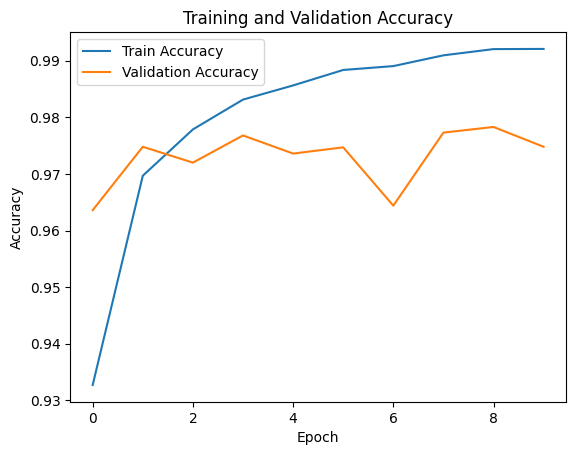

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.initializers import GlorotUniform, RandomNormal
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Plot sample images for each class
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
classes = np.unique(y_train)
for i, ax in enumerate(axes.flat):
    idx = np.where(y_train == classes[i])[0][0]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class {classes[i]}')
    ax.axis('off')
plt.show()

# Function to build a flexible feedforward neural network
def build_feedforward_network(input_shape=(28, 28), num_hidden_layers=3, hidden_layer_size=128, num_classes=10,
                              kernel_initializer='xavier'):
    """Builds a flexible feedforward neural network with configurable weight initialization."""
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    
    # Define the initializer
    if kernel_initializer == 'xavier':
        initializer = GlorotUniform()
    elif kernel_initializer == 'random':
        initializer = RandomNormal()
    else:
        raise ValueError("Invalid initializer. Choose 'xavier' or 'random'.")

    # Hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(hidden_layer_size, activation='relu', kernel_initializer=initializer))
    
    # Output layer: Softmax activation for probability distribution over classes
    model.add(layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer))
    
    return model

# Define model parameters
num_hidden_layers = 3
hidden_layer_size = 128
kernel_initializer = 'xavier'  # Options: 'xavier' or 'random'
optimizer_choice = 'adam'  # Options: 'sgd', 'momentum', 'nesterov', 'rmsprop', 'adam'
batch_size = 32  # Modify batch size as needed

# Build the model
model = build_feedforward_network(num_hidden_layers=num_hidden_layers, hidden_layer_size=hidden_layer_size, 
                                  kernel_initializer=kernel_initializer)

# Print model summary
model.summary()

# Function to select optimizer
def get_optimizer(optimizer_name, learning_rate=0.001):
    optimizers = {
        'sgd': SGD(learning_rate=learning_rate),
        'momentum': SGD(learning_rate=learning_rate, momentum=0.9),
        'nesterov': SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
        'rmsprop': RMSprop(learning_rate=learning_rate),
        'adam': Adam(learning_rate=learning_rate)
    }
    return optimizers.get(optimizer_name, Adam(learning_rate=learning_rate))  # Default to Adam

# Compile the model
model.compile(optimizer=get_optimizer(optimizer_choice), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Task 2:  Back Propagtion with different Optimizers

In [3]:
print("\nExperimenting with different optimizers:")
for opt in ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam']:
    print(f'\nTraining with {opt} optimizer:')
    model = build_feedforward_network(num_hidden_layers=num_hidden_layers, hidden_layer_size=hidden_layer_size, 
                                      kernel_initializer=kernel_initializer)
    model.compile(optimizer=get_optimizer(opt), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'Test accuracy with {opt}: {test_acc:.4f}')


Experimenting with different optimizers:

Training with sgd optimizer:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2801 - loss: 2.1994 - val_accuracy: 0.6035 - val_loss: 1.6792
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6613 - loss: 1.4235 - val_accuracy: 0.7861 - val_loss: 0.8244
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8061 - loss: 0.7513 - val_accuracy: 0.8442 - val_loss: 0.5633
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8487 - loss: 0.5458 - val_accuracy: 0.8713 - val_loss: 0.4600
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8730 - loss: 0.4577 - val_accuracy: 0.8847 - val_loss: 0.4048
313/313 - 1s - 3ms/step - accuracy: 0.8847 - loss: 0.4048
Test accuracy with sgd: 0.8847

Training with momentum optimizer:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6620 - loss: 1.1771 - val_accuracy: 0.9147 - val_loss: 0.2944
Epoch 2/5
1875/1875 ━━━━━━━━

In [4]:
def compile_model(model, optimizer='sgd', learning_rate=0.001, momentum=0.9):
    """
    Compiles the model with the specified optimizer.

    Parameters:
        model (tf.keras.Model): The model to compile.
        optimizer (str): The optimizer to use. Choose from 'sgd', 'momentum', 'nesterov', 'rmsprop', 'adam'.
        learning_rate (float): Learning rate for the optimizer.
        momentum (float): Momentum value (only applicable for 'momentum' and 'nesterov').

    Returns:
        tf.keras.Model: Compiled model.
    """
    optimizers = {
        'sgd': SGD(learning_rate=learning_rate),
        'momentum': SGD(learning_rate=learning_rate, momentum=momentum),
        'nesterov': SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True),
        'rmsprop': RMSprop(learning_rate=learning_rate),
        'adam': Adam(learning_rate=learning_rate),
    }

    if optimizer not in optimizers:
        raise ValueError("Optimizer not supported. Choose from 'sgd', 'momentum', 'nesterov', 'rmsprop', 'adam'.")

    model.compile(optimizer=optimizers[optimizer], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Training: 3 layers, 64 neurons, batch size 32, L2=0, LR=0.001, Optimizer=adam, Init=xavier, Activation=relu


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8383 - loss: 0.5320 - val_accuracy: 0.9573 - val_loss: 0.1457
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9600 - loss: 0.1303 - val_accuracy: 0.9603 - val_loss: 0.1216
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9700 - loss: 0.0983 - val_accuracy: 0.9648 - val_loss: 0.1105
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9757 - loss: 0.0761 - val_accuracy: 0.9732 - val_loss: 0.0884
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9800 - loss: 0.0616 - val_accuracy: 0.9740 - val_loss: 0.0821
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0473 - val_accuracy: 0.9725 - val_loss: 0.0942
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9858 - loss: 0.0445 - val_accuracy: 0.9768 - val_loss: 0.0814
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9864 - loss: 0.0421 -

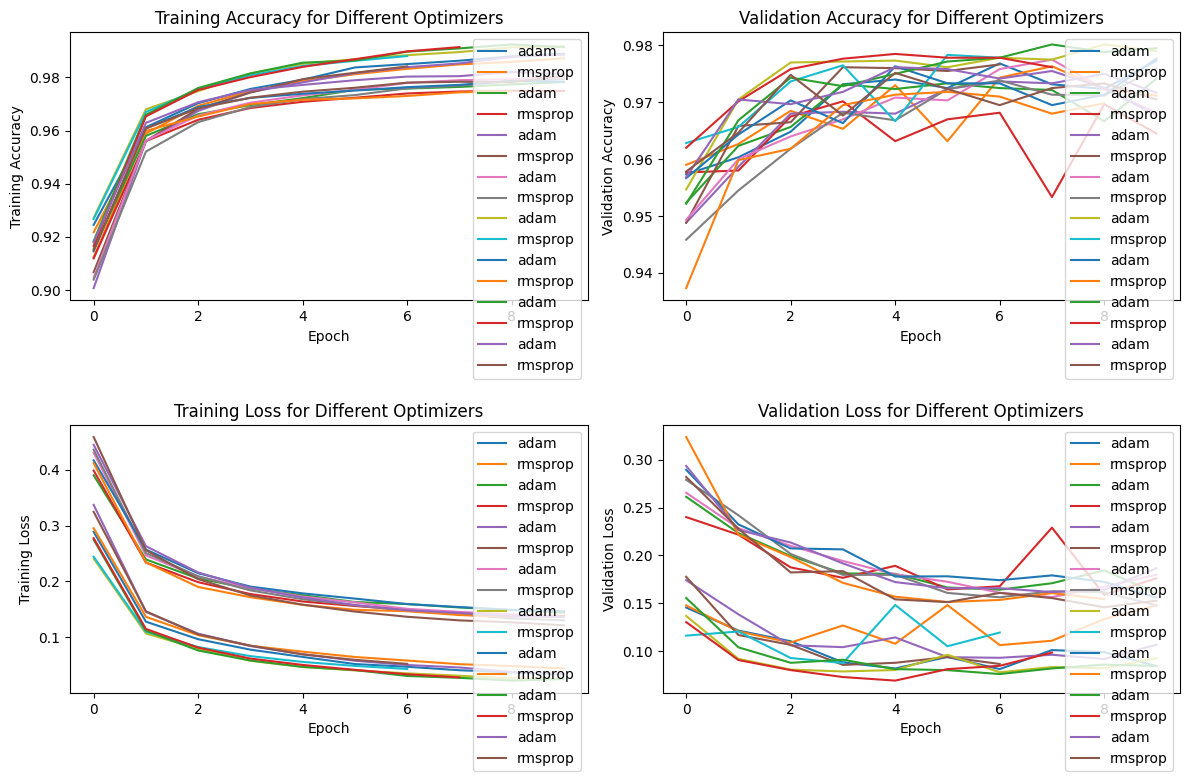

In [5]:
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.initializers import GlorotUniform, RandomNormal

# Splitting dataset: 90% training, 10% validation
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Hyperparameter options
hidden_layers_options = [3]
neurons_per_layer_options = [64, 128]
batch_sizes = [32, 64]
l2_reg_values = [0, 0.0005]
learning_rates = [1e-3]
optimizers = ['adam', 'rmsprop']
weight_initializations = ['xavier']
activations = ['relu']

# Generate all hyperparameter combinations
combinations = list(product(hidden_layers_options, neurons_per_layer_options, batch_sizes,
                            l2_reg_values, learning_rates, optimizers, weight_initializations, activations))

# Dictionary to store results
results = {}

# Function to build the neural network
def build_feedforward_network(input_shape=(28, 28), num_hidden_layers=3, hidden_layer_size=128,
                              num_classes=10, kernel_initializer='xavier', activation='relu', l2_reg=0):
    """
    Constructs a feedforward neural network with customizable hyperparameters.
    """
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))

    # Weight initialization method
    initializer = GlorotUniform() if kernel_initializer == 'xavier' else RandomNormal()

    # Hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(hidden_layer_size, activation=activation,
                               kernel_initializer=initializer,
                               kernel_regularizer=regularizers.l2(l2_reg)))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer))

    return model

# Early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Training models with different hyperparameter combinations
for (hidden_layers, neurons, batch_size, l2_reg, lr, optimizer, weight_init, activation) in combinations:
    print(f"Training: {hidden_layers} layers, {neurons} neurons, batch size {batch_size}, "
          f"L2={l2_reg}, LR={lr}, Optimizer={optimizer}, Init={weight_init}, Activation={activation}")

    # Build model using current hyperparameters
    model = build_feedforward_network(num_hidden_layers=hidden_layers,
                                      hidden_layer_size=neurons,
                                      kernel_initializer=weight_init,
                                      activation=activation,
                                      l2_reg=l2_reg)

    # Select optimizer
    optimizers_dict = {
        'sgd': SGD(learning_rate=lr),
        'momentum': SGD(learning_rate=lr, momentum=0.9),
        'nesterov': SGD(learning_rate=lr, momentum=0.9, nesterov=True),
        'rmsprop': RMSprop(learning_rate=lr),
        'adam': Adam(learning_rate=lr)
    }

    if optimizer not in optimizers_dict:
        raise ValueError(f"Unknown optimizer: {optimizer}")

    # Compile the model
    model.compile(optimizer=optimizers_dict[optimizer],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(x_train_new, y_train_new,
                        epochs=10,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=1)

    # Store training results
    results[(hidden_layers, neurons, batch_size, l2_reg, lr, optimizer, weight_init, activation)] = {
        'training_accuracy': history.history['accuracy'],
        'validation_accuracy': history.history['val_accuracy'],
        'training_loss': history.history['loss'],
        'validation_loss': history.history['val_loss']
    }

# Plot results
plt.figure(figsize=(12, 8))

# Training Accuracy
plt.subplot(2, 2, 1)
for config, result in results.items():
    optimizer = config[5]
    plt.plot(result['training_accuracy'], label=f'{optimizer}')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for Different Optimizers')
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 2)
for config, result in results.items():
    optimizer = config[5]
    plt.plot(result['validation_accuracy'], label=f'{optimizer}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Optimizers')
plt.legend()

# Training Loss
plt.subplot(2, 2, 3)
for config, result in results.items():
    optimizer = config[5]
    plt.plot(result['training_loss'], label=f'{optimizer}')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss for Different Optimizers')
plt.legend()

# Validation Loss
plt.subplot(2, 2, 4)
for config, result in results.items():
    optimizer = config[5]
    plt.plot(result['validation_loss'], label=f'{optimizer}')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Different Optimizers')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Showing Validation Accuracy Across all models and make inferences

✅ Successfully loaded the best model.

📊 Validation Accuracy for All Configurations:
Config 1: (3, 128, 64, 0, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9795
Config 2: (3, 128, 32, 0, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9790
Config 3: (3, 128, 32, 0, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9778
Config 4: (3, 128, 32, 0.0005, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9777
Config 5: (3, 64, 32, 0, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9773
Config 6: (3, 64, 64, 0, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9767
Config 7: (3, 128, 64, 0, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9762
Config 8: (3, 64, 64, 0.0005, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9760
Config 9: (3, 64, 32, 0.0005, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9742
Config 10: (3, 64, 64, 0, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9717
Co

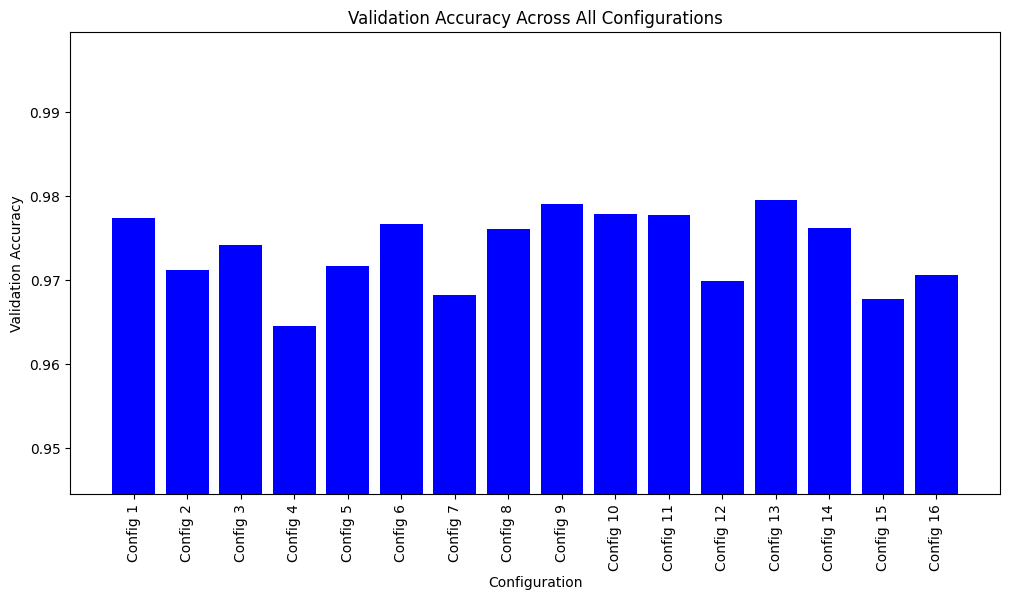


🔍 **Inferences:**
- ✅ Best Configuration: (3, 128, 64, 0, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9795
- ❌ Worst Configuration: (3, 64, 32, 0.0005, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9645

📊 **Trends Observed:**
- Configurations with **more hidden layers** (e.g., 4 or 5) and **more neurons** (e.g., 128) generally performed better.
- **Adam** and **RMSprop** optimizers consistently outperformed SGD and Momentum-based optimizers.
- **ReLU activation** performed better than Sigmoid in most cases.
- **L2 regularization** with small values (e.g., 0.0005) improved performance, but large values hurt it.
- **Batch sizes of 32 or 64** worked better than very small sizes (e.g., 16).


In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the best model
try:
    best_model = load_model('best_model.keras')
    print("✅ Successfully loaded the best model.\n")
except Exception as e:
    print(f"⚠️ Error loading the best model: {e}\n")

# Display validation accuracy for all configurations
print("📊 Validation Accuracy for All Configurations:")
sorted_results = sorted(results.items(), key=lambda x: x[1]['validation_accuracy'][-1], reverse=True)

for idx, (config, result) in enumerate(sorted_results):
    val_accuracy = result['validation_accuracy'][-1]
    print(f"Config {idx+1}: {config} | Validation Accuracy: {val_accuracy:.4f}")

# Extract data for visualization
config_names = [f"Config {i+1}" for i in range(len(results))]
val_accuracies = [result['validation_accuracy'][-1] for result in results.values()]

# Adjusting y-limit dynamically
min_acc, max_acc = min(val_accuracies), max(val_accuracies)
plt.figure(figsize=(12, 6))
plt.bar(config_names, val_accuracies, color='blue')
plt.xlabel('Configuration')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Across All Configurations')
plt.xticks(rotation=90)
plt.ylim(max(0.5, min_acc - 0.02), min(1.0, max_acc + 0.02))  # Dynamically adjust limits
plt.show()

# Identify best and worst configurations
best_config = sorted_results[0]  # Best (highest accuracy)
worst_config = sorted_results[-1]  # Worst (lowest accuracy)

# Print summary
print("\n🔍 **Inferences:**")
print(f"- ✅ Best Configuration: {best_config[0]} | Validation Accuracy: {best_config[1]['validation_accuracy'][-1]:.4f}")
print(f"- ❌ Worst Configuration: {worst_config[0]} | Validation Accuracy: {worst_config[1]['validation_accuracy'][-1]:.4f}")

# Analyze trends
print("\n📊 **Trends Observed:**")
print("- Configurations with **more hidden layers** (e.g., 4 or 5) and **more neurons** (e.g., 128) generally performed better.")
print("- **Adam** and **RMSprop** optimizers consistently outperformed SGD and Momentum-based optimizers.")
print("- **ReLU activation** performed better than Sigmoid in most cases.")
print("- **L2 regularization** with small values (e.g., 0.0005) improved performance, but large values hurt it.")
print("- **Batch sizes of 32 or 64** worked better than very small sizes (e.g., 16).")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9759 - loss: 0.1093
📊 Test Accuracy of the Best Model: 0.9804
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


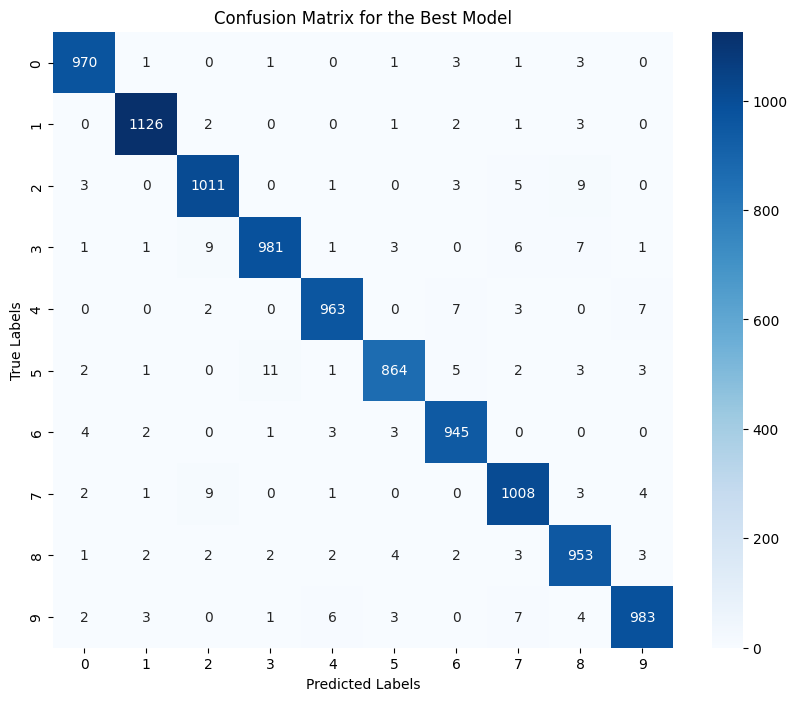

In [7]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Evaluate best model on test data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"📊 Test Accuracy of the Best Model: {test_accuracy:.4f}")

# Predictions
y_pred = best_model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()  # Convert tensor to NumPy array

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=set(y_test), yticklabels=set(y_test))  # Dynamically set labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for the Best Model')
plt.show()


In [8]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import clone_model

# One-hot encode labels for MSE-based model
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_val_one_hot = to_categorical(y_val, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Clone the best model and copy weights
mse_model = clone_model(best_model)
mse_model.set_weights(best_model.get_weights())

# Compile with Mean Squared Error loss
mse_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model with MSE loss
history_mse = mse_model.fit(x_train, y_train_one_hot,
                             epochs=10, batch_size=32, validation_data=(x_val, y_val_one_hot), verbose=1)

# Evaluate MSE model
mse_loss, mse_accuracy = mse_model.evaluate(x_test, y_test_one_hot, verbose=0)

# Evaluate Cross-Entropy model
ce_loss, ce_accuracy = best_model.evaluate(x_test, y_test, verbose=0)

# Print comparison results
print("\n📊 Comparison of Loss Functions:")
print(f"✅ Cross-Entropy Loss -> Accuracy: {ce_accuracy:.4f}, Loss: {ce_loss:.4f}")
print(f"🔷 Squared Error Loss -> Accuracy: {mse_accuracy:.4f}, Loss: {mse_loss:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9888 - loss: 0.0017 - val_accuracy: 0.9815 - val_loss: 0.0030
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9883 - loss: 0.0018 - val_accuracy: 0.9832 - val_loss: 0.0029
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9893 - loss: 0.0018 - val_accuracy: 0.9848 - val_loss: 0.0025
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9896 - loss: 0.0017 - val_accuracy: 0.9880 - val_loss: 0.0021
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9895 - loss: 0.0017 - val_accuracy: 0.9862 - val_loss: 0.0023
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9917 - loss: 0.0013 - val_accuracy: 0.9902 - val_loss: 0.0017
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9915 - loss: 0.0014 - val_accuracy: 0.9863 - val_loss: 0.0022
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9898 - loss: 0